# LINCS FAIR Assessment Summary
We investigate the assessment results using the [C2M2 assessment](https://github.com/nih-cfde/FAIR/tree/master/Demos/FAIRAssessment/c2m2)
on the LINCS metadata C2M2 serializations and a custom [FAIR Assessment](https://github.com/nih-cfde/LINCS-metadata/tree/main/FAIRAssessment/assessment) directly on the LINCS portal metadata.

## Step 1. Perform FAIR Assessement on LINCS C2M2 Datapackage using [C2M2 assessment](https://github.com/nih-cfde/FAIR/tree/master/Demos/FAIRAssessment/c2m2).

NOTE: Also possible via the [Appyter](https://appyters.maayanlab.cloud/#/?q=cfde).

```bash
# Get LINCS-metadata
git clone https://github.com/nih-cfde/LINCS-metadata.git
# Get C2M2 Assessment
git clone https://github.com/nih-cfde/FAIR.git
# Perform C2M2 assessment on LINCS-metadata
python3.8 ./FAIR/Demos/FAIRAssessment/c2m2/assess.py -i ./LINCS-metadata/c2m2_level1/datapackage.json -o assessments/c2m2/$(date +%Y-%m-%d).jsonl
```

In [1]:
import json
import requests
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path

def get_first(obj, *K):
  for k in K:
    if obj.get(k):
      return obj[k]
  return None

def sorted_indices(df):
  return (
    df
      .reindex(sorted(df.index), axis=0)
      .reindex(sorted(df.columns), axis=1)
  )

In [2]:
metric_id_to_name = {
  27: 'PI Contact (Reusable)',
  104: 'Persistent identifier (Findable)',
  106: 'Metadata conformance (Findable)',
  108: 'Resource identifier (Findable)',
  110: 'Access protocol (Accessible)',
  116: 'Data Usage License (Reusable)',
  136: 'Program name (Findable)',
  137: 'Project name (Findable)',
  138: 'Responsible institution (Findable)',
  139: 'Assay (Interoperable)',
  140: 'Anatomical Part (Interoperable)',
  141: 'Disease (Interoperable)',
  142: 'File type (Interoperable)',
  143: 'Taxonomy (Interoperable)',
  144: 'Cell Line (Interoperable)',
  145: 'Landing Page (Findable)',
  310: 'PubChem Drug (Interoperable)',
  311: 'Entrez Gene (Interoperable)',
}

In [3]:
def preprocess_c2m2(assessment, answer):
  ''' Flatten assessment/answer into something introspectable with a pandas dataframe
  '''
  import re
  if type(answer['metric']['@id']) == list:
    principle = re.match(r'^.+\((.+)\)$', metric_id_to_name[answer['metric']['@id']][0]).group(1)
  else:
    principle = re.match(r'^.+\((.+)\)$', metric_id_to_name[answer['metric']['@id']]).group(1)
  #
  return {
    'id': assessment['id'],
    'target': assessment['id'],
    'title': (assessment['target']['filename'] + ' (' + assessment['id'] + ')') if assessment['target'].get('filename') else assessment['id'],
    'metric_id': answer['metric']['@id'],
    'metric': metric_id_to_name[answer['metric']['@id']],
    'principle': principle,
    'value': answer['answer'].get('value', 0),
    'comment': answer['answer'].get('comment', ''),
    'url_comment': answer['answer'].get('url_comment', ''),
  }

c2m2 = pd.DataFrame([
    dict(preprocess_c2m2(assessment, answer), label=f.stem)
    for f in Path('assessments/c2m2/').glob('*.jsonl')
    for assessment in map(json.loads, f.open())
    if assessment and assessment.get('answers')
    for answer in assessment['answers']
])

c2m2

,id,target,title,metric_id,metric,principle,value,comment,url_comment,label
0,http://www.lincsproject.org/LDS-1176,http://www.lincsproject.org/LDS-1176,LDS-1176_1.1.tar.gz (http://www.lincsproject.o...,106,Metadata conformance (Findable),Findable,0.807143,Computed based on completeness of file (0.80) ...,,2021-06-23
1,http://www.lincsproject.org/LDS-1176,http://www.lincsproject.org/LDS-1176,LDS-1176_1.1.tar.gz (http://www.lincsproject.o...,136,Program name (Findable),Findable,1.000000,Identified known program LINCS,,2021-06-23
2,http://www.lincsproject.org/LDS-1176,http://www.lincsproject.org/LDS-1176,LDS-1176_1.1.tar.gz (http://www.lincsproject.o...,137,Project name (Findable),Findable,0.000000,No project found,,2021-06-23
3,http://www.lincsproject.org/LDS-1176,http://www.lincsproject.org/LDS-1176,LDS-1176_1.1.tar.gz (http://www.lincsproject.o...,27,PI Contact (Reusable),Reusable,0.750000,"Contact email found, possibly PI",,2021-06-23
4,http://www.lincsproject.org/LDS-1176,http://www.lincsproject.org/LDS-1176,LDS-1176_1.1.tar.gz (http://www.lincsproject.o...,138,Responsible institution (Findable),Findable,0.000000,No information about the contributing institut...,,2021-06-23
...,...,...,...,...,...,...,...,...,...,...
49275180,https://www.lincsproject.org/LDS-1069,https://www.lincsproject.org/LDS-1069,LDS-1069_1.1.tar.gz (https://www.lincsproject....,143,Taxonomy (Interoperable),Interoperable,1.000000,Taxonomy is present and validated in ncbi,NCBI:txid9606,2021-08-23
49275181,https://www.lincsproject.org/LDS-1069,https://www.lincsproject.org/LDS-1069,LDS-1069_1.1.tar.gz (https://www.lincsproject....,116,Data Usage License (Reusable),Reusable,0.000000,No information about data usage licenses are d...,,2021-08-23
49275182,https://www.lincsproject.org/LDS-1069,https://www.lincsproject.org/LDS-1069,LDS-1069_1.1.tar.gz (https://www.lincsproject....,104,Persistent identifier (Findable),Findable,0.500000,A persistent_id was identified but it is not a...,https://lincsportal.ccs.miami.edu/datasets/vie...,2021-08-23
49275183,https://www.lincsproject.org/LDS-1069,https://www.lincsproject.org/LDS-1069,LDS-1069_1.1.tar.gz (https://www.lincsproject....,108,Resource identifier (Findable),Findable,1.000000,An id and namespace were provided for the reso...,LDS-1069 https://www.lincsproject.org/,2021-08-23


In [4]:
c2m2.pivot_table(index='metric', columns='label', values='value', aggfunc='mean')

label,2021-06-23,2021-08-23
metric,,
Access protocol (Accessible),0.000000,0.000000
Anatomical Part (Interoperable),0.863031,0.989584
Assay (Interoperable),0.500007,0.500007
Cell Line (Interoperable),0.000000,0.000000
Data Usage License (Reusable),0.000000,0.000000
Disease (Interoperable),0.000000,0.000000
File type (Interoperable),0.750000,0.750000
Landing Page (Findable),0.983531,0.983449
Metadata conformance (Findable),0.856166,0.847695


In [5]:
# Looking at increase in anatomic part
(
  c2m2[c2m2['metric'] == 'Anatomical Part (Interoperable)']
    .groupby('label')['url_comment']
    .value_counts()
    .unstack()
    .fillna(0)
    .T
    .sort_values('2021-08-23')
)

label,2021-06-23,2021-08-23
url_comment,,
UBERON:0003889,6.0,6.0
UBERON:0000029,8.0,8.0
UBERON:0002397,8.0,8.0
UBERON:0000056,11.0,11.0
UBERON:0002110,11.0,11.0
...,...,...
UBERON:0002113,123445.0,123727.0
UBERON:0002097,110195.0,128089.0
UBERON:0002048,168048.0,187041.0


In [6]:
# The types of errors causing landing page to not be 1
(
  c2m2[c2m2['metric'] == 'Landing Page (Findable)']
    .groupby('label')['comment']
    .value_counts()
    .unstack()
    .fillna(0)
    .T
)

label,2021-06-23,2021-08-23
comment,,
Error:,0.0,506.0
valid and HEAD reports 200,1423118.0,1422900.0
valid url but HEAD reported 404,31939.0,31420.0
valid url but HEAD reported 500,12.0,10.0


## Step 2. Perform FAIR Assessement on LINCS Portal Data using [LINCS assessment](https://github.com/nih-cfde/LINCS-metadata/tree/main/FAIRAssessment/assessment).
```bash
# Get LINCS-metadata
git clone https://github.com/nih-cfde/LINCS-metadata.git
# Grab LINCS Portal Data
mkdir -p data
curl https://maayanlab.cloud/sigcom-lincs/metadata-api/libraries | jq -rc '.[]' > data/libraries.jsonl
curl https://maayanlab.cloud/sigcom-lincs/metadata-api/signatures | jq -rc '.[]' > data/signatures.jsonl
# Perform assessment on LINCS-metadata
python3.8 ./LINCS-metadata/FAIRAssessment/assessment/assess.py \
  -s data/signatures.jsonl \
  -l data/libraries.jsonl \
  -o assessments/lincs/$(date +%Y-%m-%d).jsonl
```

In [7]:
# get lincs library metadata from sigcom-lincs
lincs_libraries = {
    library['id']: library
    for library in requests.get('https://maayanlab.cloud/sigcom-lincs/metadata-api/libraries').json()
}

In [8]:
# Load all lincs assessment results
lincs = pd.DataFrame([
    {
        'label': f.stem,
        'metric_id': answer['metric']['@id'],
        'metric': metric_id_to_name[answer['metric']['@id']],
        'answer_value': answer['answer'].get('value'),
        'answer_comment': answer['answer'].get('comment'),
        'answer_url_comment': answer['answer'].get('url_comment'),
        'target_id': assessment['target']['id'],
        'target_library_id': assessment['target']['library']['id'],
        'target_library': lincs_libraries[assessment['target']['library']['id']]['dataset'],
    }
    for f in Path('./assessments/lincs/').glob('*.jsonl')
    for assessment in map(json.loads, f.open())
    for answer in assessment['answers']
])

lincs

,label,metric_id,metric,answer_value,answer_comment,answer_url_comment,target_id,target_library_id,target_library
0,2021-06-23,106,Metadata conformance (Findable),1.00,Instance validates against its own validator,None,beae56c1-ccb7-5420-b019-2264722c61a6,54198d6e-fe17-5ef8-91ac-02b425761653,l1000_cp
1,2021-06-23,138,Responsible institution (Findable),0.00,Center name is not present in metadata,None,beae56c1-ccb7-5420-b019-2264722c61a6,54198d6e-fe17-5ef8-91ac-02b425761653,l1000_cp
2,2021-06-23,110,Access protocol (Accessible),0.75,Access protocol (https) is encoded in uri,#/meta/persistent_id,beae56c1-ccb7-5420-b019-2264722c61a6,54198d6e-fe17-5ef8-91ac-02b425761653,l1000_cp
3,2021-06-23,139,Assay (Interoperable),0.25,Assay found but not verified in OBI.,OBI:0002965,beae56c1-ccb7-5420-b019-2264722c61a6,54198d6e-fe17-5ef8-91ac-02b425761653,l1000_cp
4,2021-06-23,140,Anatomical Part (Interoperable),1.00,Ontological IRI for anatomy found in UBERON.,UBERON:0002367,beae56c1-ccb7-5420-b019-2264722c61a6,54198d6e-fe17-5ef8-91ac-02b425761653,l1000_cp
...,...,...,...,...,...,...,...,...,...
35272097,2021-09-20,144,Cell Line (Interoperable),0.50,"Ontological IRI not found, but cell line found...",U2OS,bdb99682-fd7d-573c-8139-625283fb1536,8f1ff550-ece8-591d-a213-2763f854c008,l1000_shRNA
35272098,2021-09-20,116,Data Usage License (Reusable),0.00,No information about data usage licenses are d...,None,bdb99682-fd7d-573c-8139-625283fb1536,8f1ff550-ece8-591d-a213-2763f854c008,l1000_shRNA
35272099,2021-09-20,104,Persistent identifier (Findable),0.00,No persistent_id defined,None,bdb99682-fd7d-573c-8139-625283fb1536,8f1ff550-ece8-591d-a213-2763f854c008,l1000_shRNA
35272100,2021-09-20,108,Resource identifier (Findable),1.00,A resource id is present,bdb99682-fd7d-573c-8139-625283fb1536,bdb99682-fd7d-573c-8139-625283fb1536,8f1ff550-ece8-591d-a213-2763f854c008,l1000_shRNA


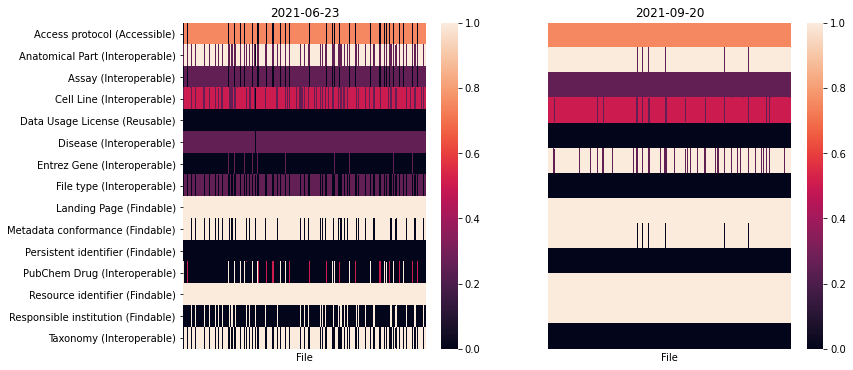

In [9]:
# Take a sample of the individual item answers
labels = lincs['label'].unique(); labels.sort()
metrics = lincs['metric'].unique(); metrics.sort()
fig, axes = plt.subplots(1, len(labels), figsize=(6*len(labels), 6))
for i, (label, ax) in enumerate(zip(labels, axes)):
  records = lincs[lincs['label'] == label]
  answer_matrix = records.groupby(['target_id', 'metric'])['answer_value'].mean().unstack()
  sns.heatmap(sorted_indices(answer_matrix.sample(1000).fillna(0).T), yticklabels=(i == 0), xticklabels=False, ax=ax)
  ax.set_ylabel('')
  ax.set_xlabel('File')
  ax.set_title(label)
plt.show()

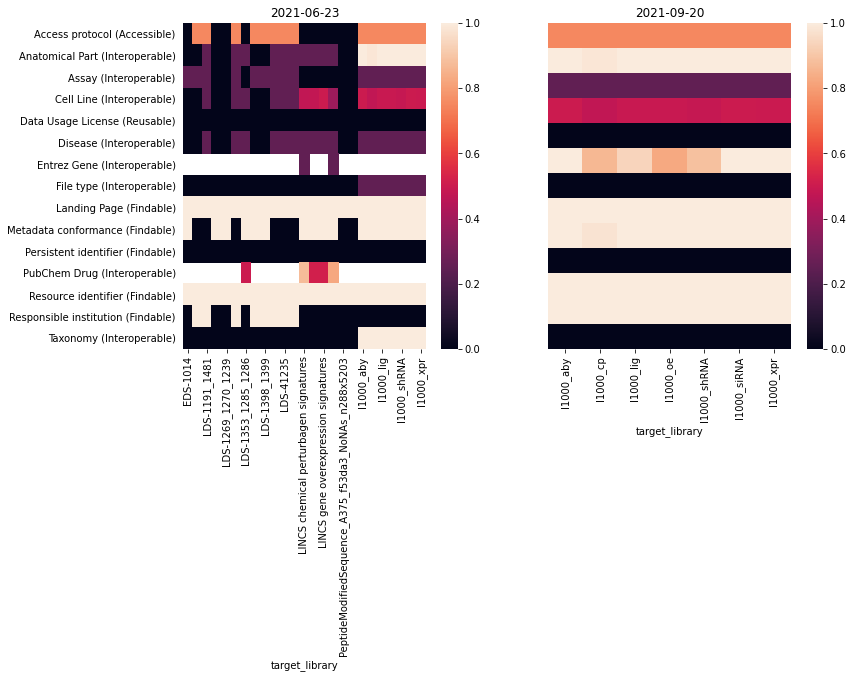

In [10]:
# See average answer per library
labels = lincs['label'].unique(); labels.sort()
fig, axes = plt.subplots(1, len(labels), figsize=(6*len(labels), 6))
for i, (label, ax) in enumerate(zip(labels, axes)):
  records = lincs[lincs['label'] == label]
  answer_matrix = records.groupby(['target_library', 'metric'])['answer_value'].mean().unstack()
  sns.heatmap(sorted_indices(answer_matrix.T), yticklabels=(i == 0), ax=ax)
  ax.tick_params(left=False, bottom=True)
  ax.set_ylabel('')
  ax.set_title(label)
plt.show()

## Step 3. Compare assessment on C2M2 with SigCom-LINCS Assessment

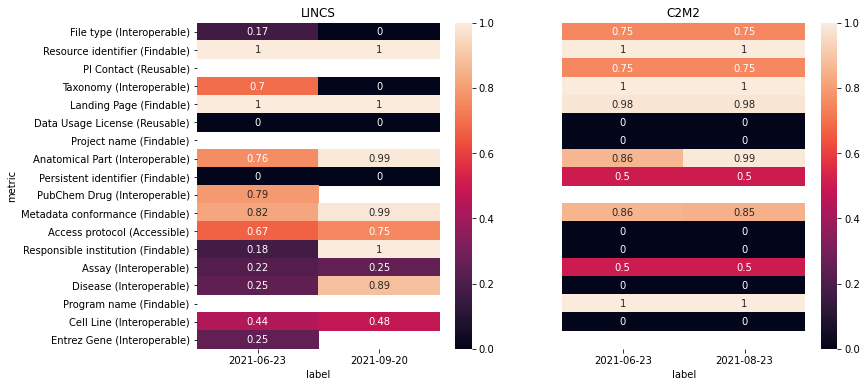

In [11]:
lincs_grid = lincs.pivot_table(columns='metric', index='label', values='answer_value', aggfunc='mean')
c2m2_grid = c2m2.pivot_table(columns='metric', index='label', values='value', aggfunc='mean')
# put NaNs wherever the grid columns don't overlap
for col in c2m2_grid.columns:
  if col not in lincs_grid.columns:
    lincs_grid[col] = float('nan')
for col in lincs_grid.columns:
  if col not in c2m2_grid.columns:
    c2m2_grid[col] = float('nan')
cols = list(set(c2m2_grid.columns) & set(lincs_grid.columns))
lincs_grid = lincs_grid[cols].T
c2m2_grid = c2m2_grid[cols].T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(lincs_grid, annot=True, ax=ax1)
ax1.set_title('LINCS')
sns.heatmap(c2m2_grid, annot=True, yticklabels=False, ax=ax2)
ax2.set_title('C2M2')
ax2.set_ylabel('')
plt.show()

## Step 4. Prepare Current Assessment Summaries for FAIRshake
These computational assessments are extremely granular and useful for
in-depth per-file/signature review. However, our data is highly uniform
within each library, and as such, it makes sense to generate per-library
summary assessments and submitting these to FAIRshake.

Effectively, the heatmaps we looked at above will be registered with FAIRshake
for external review and historical archiving. These per-library results
will also be available as FAIR Insignias on SigCom-LINCS with the help of FAIRshake.

In [12]:
from collections import OrderedDict
fairshake = OrderedDict()

### SigCom-LINCS Assessments

In [13]:
labels = lincs['label'].unique(); labels.sort()
current = lincs[lincs['label'] == labels[-1]]
current

,label,metric_id,metric,answer_value,answer_comment,answer_url_comment,target_id,target_library_id,target_library
20439802,2021-09-20,106,Metadata conformance (Findable),1.00,Instance validates against its own validator,None,aeb0f4f8-5453-52c1-a39b-c9788d6fba8a,b953025a-4356-5cc8-b6e3-dcf2f4f85420,l1000_siRNA
20439803,2021-09-20,138,Responsible institution (Findable),1.00,Center name is present in metadata,None,aeb0f4f8-5453-52c1-a39b-c9788d6fba8a,b953025a-4356-5cc8-b6e3-dcf2f4f85420,l1000_siRNA
20439804,2021-09-20,110,Access protocol (Accessible),0.75,Access protocol (https) is encoded in uri,#/meta/persistent_id,aeb0f4f8-5453-52c1-a39b-c9788d6fba8a,b953025a-4356-5cc8-b6e3-dcf2f4f85420,l1000_siRNA
20439805,2021-09-20,110,Access protocol (Accessible),0.75,Access protocol (https) is encoded in uri,#/library/meta/datalevel_5,aeb0f4f8-5453-52c1-a39b-c9788d6fba8a,b953025a-4356-5cc8-b6e3-dcf2f4f85420,l1000_siRNA
20439806,2021-09-20,139,Assay (Interoperable),0.25,Assay found but not verified in OBI.,L1000 mRNA profiling assay,aeb0f4f8-5453-52c1-a39b-c9788d6fba8a,b953025a-4356-5cc8-b6e3-dcf2f4f85420,l1000_siRNA
...,...,...,...,...,...,...,...,...,...
35272097,2021-09-20,144,Cell Line (Interoperable),0.50,"Ontological IRI not found, but cell line found...",U2OS,bdb99682-fd7d-573c-8139-625283fb1536,8f1ff550-ece8-591d-a213-2763f854c008,l1000_shRNA
35272098,2021-09-20,116,Data Usage License (Reusable),0.00,No information about data usage licenses are d...,None,bdb99682-fd7d-573c-8139-625283fb1536,8f1ff550-ece8-591d-a213-2763f854c008,l1000_shRNA
35272099,2021-09-20,104,Persistent identifier (Findable),0.00,No persistent_id defined,None,bdb99682-fd7d-573c-8139-625283fb1536,8f1ff550-ece8-591d-a213-2763f854c008,l1000_shRNA
35272100,2021-09-20,108,Resource identifier (Findable),1.00,A resource id is present,bdb99682-fd7d-573c-8139-625283fb1536,bdb99682-fd7d-573c-8139-625283fb1536,8f1ff550-ece8-591d-a213-2763f854c008,l1000_shRNA


In [14]:
# register digital objects
for library in current['target_library_id'].unique():
  title = get_first(
    lincs_libraries[library]['meta'],
    'title', 'libraryName', 'SourceID', 'description'
  )
  assert title is not None
  description = get_first(
      lincs_libraries[library]['meta'],
      'libraryInfo', 'description',
  )
  obj = {
    '@type': 'DigitalObject',
    'title': title,
    'url': '\n'.join(filter(None, [
        f"https://maayanlab.cloud/sigcom-lincs/#/Datasets/{library}",
        lincs_libraries[library]['meta'].get('url_prefix'),
    ] + [
        v['link']
        for k, v in lincs_libraries[library]['meta'].items()
        if type(v) == dict and 'link' in v
    ])),
    'rubrics': [107], # LINCS Rubric
    'projects': [92], # LINCS CFDE Assessments
  }
  if description != title and description:
    obj['description'] = description
  fairshake[(library, 'DigitalObject')] = obj

In [15]:
answer_matrix = current.groupby(['target_library_id', 'metric_id'])['answer_value'].mean().unstack()
for library, assessment in answer_matrix.iterrows():
  fairshake[(library, 'Assessment')] = {
    '@type': 'Assessment',
    'methodology': 'auto',
    'published': True,
    'target': { '@id': (library, 'DigitalObject') },
    'rubric': 107, # LINCS Rubric
    'project': 92, # LINCS CFDE Assessments
  }
  # fairshake[(library, 'assessment')] 
  for metric, answer in assessment.iteritems():
    fairshake[(library, metric, 'Answer')] = {
      '@type': 'Answer',
      'assessment': { '@id': (library, 'Assessment') },
      'metric': metric,
      'answer': None if pd.isna(answer) else answer,
    }

## Submit to FAIRshake